In [1]:
%matplotlib inline

import logging
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import sys
sns.set_context('talk')

Assumes that the following rsync has happened:

`rsync -av orchids-compute:/data1/urebbapr/MLOC/notebooks/r0.comparison.scores.h5 .`

# Comparison of r0 metrics

With the following feature sets:

- weather only
- weather + r0 historical
- weather + CN2
- weather + CN2 + r0 historical

In [10]:
F_H5 = 'r0.comparison.scores.h5'
df_scores_r0_weather = pd.read_hdf(F_H5, '/scores/r0_weather')
df_scores_r0_weather_hist = pd.read_hdf(F_H5, '/scores/r0_weather_historical')
df_scores_r0_cn2_weather = pd.read_hdf(F_H5, '/scores/r0_cn2_weather')
df_scores_r0_cn2_weather_hist = pd.read_hdf(F_H5, '/scores/r0_cn2_weather_historical')

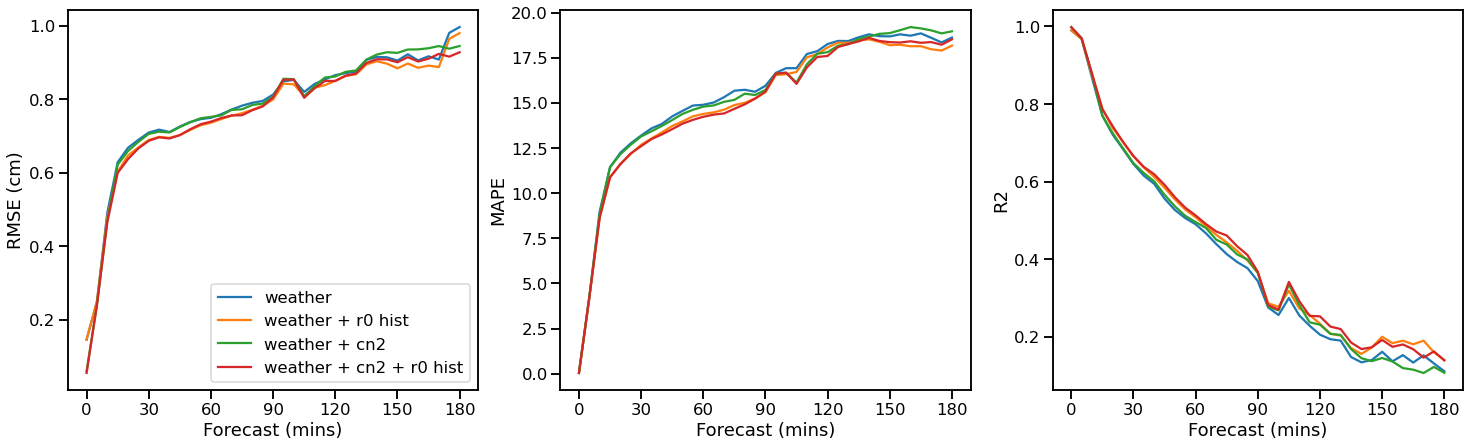

In [18]:

fig, ax = plt.subplots(1, 3, figsize=(25, 7))

ax[0].plot(df_scores_r0_weather.index, df_scores_r0_weather.RMSE, label='weather')
ax[0].plot(df_scores_r0_weather_hist.index, df_scores_r0_weather_hist.RMSE, label='weather + r0 hist')
ax[0].plot(df_scores_r0_cn2_weather.index, df_scores_r0_cn2_weather.RMSE, label='weather + cn2')
ax[0].plot(df_scores_r0_cn2_weather_hist.index, df_scores_r0_cn2_weather_hist.RMSE, label='weather + cn2 + r0 hist')

ax[0].set_ylabel(f'RMSE (cm)')
ax[0].set_xlabel('Forecast (mins)')
ax[0].set_xticks(range(0, 210, 30))
ax[0].legend()

ax[1].plot(df_scores_r0_weather.index, df_scores_r0_weather.MAPE*100, label='weather')
ax[1].plot(df_scores_r0_weather_hist.index, df_scores_r0_weather_hist.MAPE*100, label='weather + r0 hist')
ax[1].plot(df_scores_r0_cn2_weather.index, df_scores_r0_cn2_weather.MAPE*100, label='weather + cn2')
ax[1].plot(df_scores_r0_cn2_weather_hist.index, df_scores_r0_cn2_weather_hist.MAPE*100, label='weather + cn2 + r0 hist')
ax[1].set_ylabel('MAPE')
ax[1].set_xlabel('Forecast (mins)')
ax[1].set_xticks(range(0, 210, 30))

ax[2].plot(df_scores_r0_weather.index, df_scores_r0_weather.R2, label='weather')
ax[2].plot(df_scores_r0_weather_hist.index, df_scores_r0_weather_hist.R2, label='weather + r0 hist')
ax[2].plot(df_scores_r0_cn2_weather.index, df_scores_r0_cn2_weather.R2, label='weather + cn2')
ax[2].plot(df_scores_r0_cn2_weather_hist.index, df_scores_r0_cn2_weather_hist.R2, label='weather + cn2 + r0 hist')
ax[2].set_ylabel('R2')
ax[2].set_xlabel('Forecast (mins)')
ax[2].set_xticks(range(0, 210, 30))
plt.savefig('r0.comparison.png')
plt.show()